# Week 4 Overview
This week, you’ll explore two powerful strategies for identifying causal relationships when traditional regression methods fall short: **instrumental variables** and **regression discontinuity designs**. 
- You’ll begin by learning how **instrumental variables** can help isolate causal effects when a confounder — something that influences both the treatment and the outcome — makes it difficult to draw conclusions from observational data. 
- Then, you’ll turn to **regression discontinuity**, a method that uses sharp thresholds (like test score cutoffs) to simulate randomized experiments and uncover treatment effects. Through hands-on data exercises, you'll practice computing these effects, compare different estimation methods, and create your own scenarios to deepen your understanding of each approach. By the end of the week, you'll be better equipped to design and interpret studies that go beyond correlation and aim for true causal insight.

### Learning Objectives 
At the end of this week, you will be able to: 
- Conduct an instrumental variables study 
- Invent your own scenario that uses instrumental variables 
- Conduct a regression discontinuity study 
- Invent your own regression discontinuity example 

##  Instrumental Variables
An **instrumental variable (IV)** is a variable that influences the treatment but has no direct effect on the outcome, except through that treatment. 

**Instrumental variables** are used in causal inference when we suspect that a variable influencing the outcome is also related to an unmeasured confounder — making simple regression unreliable for identifying cause and effect. 

An **instrumental variable** helps solve this problem by serving as a tool to indirectly manipulate the treatment variable without being directly connected to the outcome itself, except through that treatment.

For an instrument to be valid, it must be correlated with the treatment and affect the outcome only through the treatment — not through any other path. 

IV methods are especially valuable when randomized experiments aren’t possible, allowing researchers to simulate experimental conditions within observational data. 

By using an instrument to isolate variation in the treatment that is independent of confounders, we can more confidently estimate the true causal effect.

## 1.1 Lesson: Instrumental Variables
In this video, you’ll explore how instrumental variables can help uncover causal relationships when confounding variables make direct comparisons unreliable.

### Further Applications of Instrumental Variables
Lets go over another simple application of **instrumental variables:**
- `deer` are likely to eat `flowers` (more `deer` = less `flowers`), *but*
- `deer` are repelled by `pesticides` (which also happen to kill this particular species of `flower`)
- This means that you cannot simply assume that the relationship between `deer` and `flowers` is a causal one.

The `pesticides` are a confounder. 
- More `deer` and more `flowers` in the data *might* mean that the `deer` are leaving the `flowers` alone. 
- But it *also* might mean that there were fewer `pesticides` (causing more `deer`).
- Because there are fewer `pesticides`, there are more `flowers`

In the latter case, if you assume that deer increase flowers, you might be wrong. In this (completely made-up) scenario, it was actually the reduction in pesticides that increased the deer and more flowers. If you introduce more deer to the area, you might be surprised that the flowers are eaten faster than you’d anticipated because the deer were added without reducing pesticides. This means that you can be mistaken about the causal impact of deer on flowers.
___ 

Now, let's add an **instrumental variable** - `weather`:
- When its sunny and hot the `deer` stay in their hiding place and `flowers` don't get eaten.
- The sun has nothing to do with `pesticides`, which are sprayed equally when the `weather` is sunny or cloudy.
- You believe that the sunny `weather` does not directly affect the rate at which `flowers` increase or decrease. 


![Instrumental Variables-2.png](<attachment:Instrumental Variables-2.png>)

Let's assign some variables to this example and build our model:
- `weather` is $Z$:
    - $Z = 0$ (cloudy)
    - $Z = 1$ (sunny)
- $X$ is the number of `deer`
- $Y$ is the rate at which `flowers` are increasing or decreasing in number.

Then, for each $Z$ (weather), and $W$ (pesticides), there is a specific value of $X$ and $Y$. We can compute the effect for a particular value of $W$ by using $Z$ to alter $X$ while holding $W$ constant:

$$\frac{Y (W,Z = 1) - Y(W,Z = 0)}{Z(W,Z = 1) - X(W,Z = 0)}$$

This is a **Causal Effect**, because it modifies $X$ without changing $W$. (Assuming there are no other confounders, that is).

If there aren't, then the way we modify $X$ (in this case, by changing $Z$) doesn't matter so long as it isn't changing $W$. Now, if we take the average over *all* values $W$, we have the average causal effect of $X$ on $Y$.
___
*Remember:* $Z$ doesn't affect $Y$ directly:
- In the expression $Y(W,Z = 1)$, the only reason that $Y$ depends on $Z$ is that $Y$ depends on $X$, which depends on $Z$. The causal effect then involves taking the mean of this expression over $W$:

$$ \left\langle \frac{Y (W,Z = 1) - Y(W,Z = 0)}{Z(W,Z = 1) - X(W,Z = 0)} \right\rangle$$

However, this equation may be difficult to compute without knowing the effect of each $W$. 

In particular, we want a method that works even if we cannot measure the amount of `pesticides` and, in fact, even if we don’t know for sure that `pesticides` are the confounder. 

All we know is that $Z$ isn’t correlated with any confounders.

We an compute an approximately similar equation quite easily:

$$\frac{\langle Y(W, Z =1) \rangle w - \langle Y(W,Z = 0)\rangle}{\langle X(W,Z = 1)\rangle w - \langle X(W,Z = 0)\rangle}$$

Here, we take the average of the numerator divided by the average of the denominator. We can compute this without knowing $W$ because we can just compute the mean $\langle Y(Z = 1)\rangle$ over all datapoints. We don't even have to know what particular confounder $W$ is Important.

This is about the same thing so long as we assume that the ratio (the effect) is not that different for different values of $W$. (If it is very different, then perhaps we shouldn’t expect to find a good definition of “the” effect!) 
___ 

For example, here is a table of possible values: 

| | $X$ (`deer`) | $Y$ (`flowers` rate) | $Z$ (`weather`) | $W$ (`pesticide`) |
| :--- | :--- | :--- | :--- | :--- |
| A | 3 | 0 | 0 | 2 |
| B | 4 | -1 | 0 | 2 |
| C | 5 | -1 | 0 | 1 |
| D | 6 | -2 | 0 | 1 |
| E | 1 | 2 | 1 | 2 |
| F | 2 | 1 | 1 | 2 |
| G | 3 | 1 | 1 | 1 |
| H | 4 | 0 | 1 | 1 |

Let’s apply the first equation. Notice that the criteria about $Z$ affecting only $X$ are satisfied: 
- $Z$ affects $Y$ only through $X$, not directly. In particular, if we control for $X$, then $Y$ and $Z$ are not correlated as $Y = 5 – X -  W$, so $Z$ does not appear directly in the equation for $Y$.
- Also there is no correlation between $Z$ and $W$. Either of the two values of $W$ can lead to either of the two values of $Z$.

In each case, I have averaged the values for the two samples with the appropriate $W$ and $Z$ values. 

For $W = 1$:

$Y (W = 1, Z = 1) - Y(W = 1, Z = 0) \; = \; \langle G_Y, H_Y \rangle - \langle C_Y, D_Y \rangle \; = \; 0.5 - (-1.5) \; = \; 2$

$X (W = 1, Z = 1) - X(W = 2, Z = 0) \; = \; \langle G_X, H_X \rangle - \langle C_X, D_X \rangle \; = \; 3.5 - 5.5 \; = \; -2$

The ratio for $W = 1$ is then $\frac{0.5 - (-1.5)}{3.5 - 5.5} \; = \; -1$

For $W = 2$:

$Y (W = 2, Z = 1) - Y(W = 2, Z = 0) \; = \; \langle E_Y, F_Y \rangle - \langle A_Y, B_Y \rangle \; = \; 1.5 - (-0.5) \; = \; 2$

$X (W = 2, Z = 1) - X(W = 2, Z = 0) \; = \; \langle E_X, F_X \rangle - \langle A_X, B_X \rangle \; = \; 1.5 - 3.5 \; = \; -2$

The ratio for $W = 2$ then is $\frac{1.5 - (-0.5)}{1.5 - 3.5} \; = \; -1$

and averaging the two gives: $\frac{-1 + (-1)}{2} \; = \; -1$

On the otherhand, averaging $W$ *first* also yields -1:

$ \frac { \langle Y(Z=1) \rangle - \langle (Y(Z=0))\rangle}{\langle X(Z = 1) \rangle - \langle X(Z = 0) \rangle} \; = \; ?$

$\langle E_Y, F_Y, G_Y, H_Y \rangle - \langle A_Y, B_Y, C_Y, D_Y \rangle \; = \; 1 - (-1) \; = \; 2$

$\langle E_X, F_X, G_X, H_X \rangle - \langle A_X, B_X, C_X, D_X \rangle \; = \; 2.5 - 4.5 \; = \; -2$ The ratio is then (again) $\frac{2}{-2} = -1$

There is no guarantee that these two results will always be identical, but we hope they will be similar. An example where they might not be similar is if the ratio for some particular $W$ value is very different from some others. 

This suggests that adding a deer reduces the flower rate by 1. This is the causal effect, not the correlative effect. Correlatively, we’d fit the flower rate to the number of deer linearly, leaving the `pesticides` ($W$) out of it. 

If we do this using linear regression, we get $\mathbb{rate}_{\mathbb{ flower}} \; = \; 2.72 - 0.78 \cdot \mathbb{deer}$

The flower rate is casually more strongly related to the deer count than it is correlatively because -1 is bigger in magnitude than -0.78.

Now I’ll reveal the secret formula I used to compute the flower rate $Y$. It is: $Y \; = \;  5 - X_{\text{deer}} - W_{\text{pesticides}}$. 

(Actually, I mentioned this secret formula earlier.). 

With this formula: 
- Adding a `deer` reduces the `flower` rate by precisely 1, so the computation of the causal effect is precisely correct. 
- The reason the correlative number is not as strong as the causal one is that the `pesticides` also influence the number of `deer` as well as the `flower` rate. 
The correlation is reduced relative to the causation because when the deer number is higher, the pesticide number is lower, and so the flower number is higher. This will appear to counter the “deer eat flowers pattern.” 
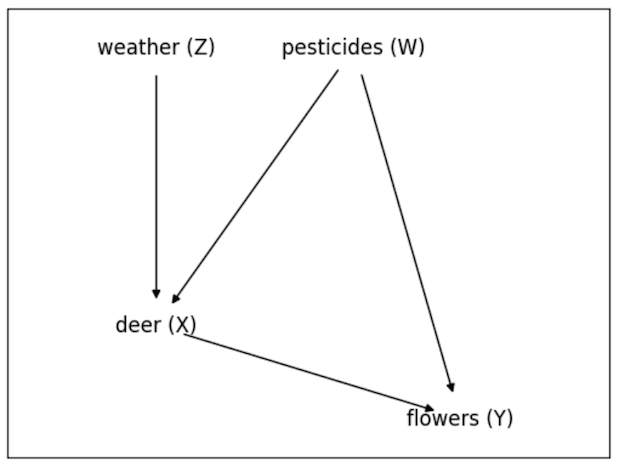

## Chapter 8 - Causal Paths and Closing Back Doors

8.1 | Walk the Line
Previous chapters have emphasized the concept of the causal diagram. I, the author of this book, clearly have a thing for nodes and arrows.

The reason these diagrams can be so useful for applied researchers is that they make clear the different reasons why two variables might be related to each other, and also what we need to do to identify the answer to our research question.

Both of these benefits of causal diagrams come about by thinking carefully about the **paths** from one variable to another on a diagram. These paths tell us why:
- Two variables are related 
- What causes the otehr

A **path** between two variabes on a causal diagram is a desription of a set of arrows and nodes you visit when "walking" from one variable to another. 

### Good Paths and Bad Paths
- **Good Paths** are the reasons why the treatment and outcome variables are related that you think should “count” for your research question. 
- **Bad paths** are the paths that shouldn’t count, in other words the alternate explanations.

## Topic Overview: Regression Discontinuity
**Regression discontinuity (RD)** is a quasi-experimental method used to identify causal effects when treatment is assigned based on a sharp cutoff in a continuous variable — such as a test score, age limit, or income threshold. The key idea is that individuals just above and just below the cutoff are nearly identical in all respects, except for receiving or not receiving the treatment. By focusing the analysis around the cutoff point, RD allows researchers to estimate the local average treatment effect with minimal bias from confounders. It is especially useful in policy, education, and clinical settings, where eligibility rules create natural breakpoints in otherwise continuous processes. This method leverages real-world decision thresholds to reveal cause-and-effect relationships in settings where randomized experiments aren’t feasible. 

### Learning Objectives 
- Do a regression discontinuity study 
- Invent your own regression discontinuity example 

## 2.1 Lesson: Regression Discontinuity
In this video, you’ll see how **regression discontinuity** designs use cutoff-based rules—like test score thresholds—to estimate causal effects in situations where randomized experiments aren’t possible.

#### Regression discontinuity is another regression-based method, see this illustrated example:
Students who score above a cutoff of 80% on a test are allowed to take a challenging math course. We want to know whether this math course impacts admission to college. The problem is that there may be many confounders: 

Perhaps the students who take the math course have greater mathematical ability, which gets them into college, and our particular course doesn’t matter. 

However, there is one trick we can use to get rid of all confounders: 
- We assume that students who get 79% and 81% are almost exactly the same, statistically speaking — they don’t really differ in mathematical ability. 
- The only way in which they differ is that the 81%ers got into the class and the 79%ers didn’t. 
- So, we can perform the following regression: 
    - The test score as the `“Running Variable”`
    - The 80% value as the `“Cutoff.”` 
    - `“Treated”` refers to whether we are above the `cutoff` (`1` if so, `0` if not), 
    - “(`Running` - `Cutoff`) x `Treated`” is just the product of the two. (It is used to detect any change in slope after the cutoff.) 
    
    
This regression assumes that there may be a linear relationship between the outcome $Y$ and the running variable and that this linear relationship may differ before and after the cutoff. However, we assume that any quadratic relationship (or higher polynomial terms) is not worth modeling here. 

$ Y \; = \; \beta_0 + \beta_1 (\text{Running - Cutoff}) + \beta_2 \cdot \text{Treated} + \beta_3 (\text{Running - Cutoff}) \cdot \text{Treated} + \epsilon$

Or

$ Y \; = \;  \beta_0 + \beta_1 (\text{Test Score - Cutoff}) +  \beta_2 \cdot \text{Takes Course} + \beta_3 (\text{Test Score - Cutoff}) \cdot \text{Takes Course} + \epsilon$

If we used a very narrow window before and after the Cutoff (say, 79.9% to 80.1%) then it is unlikely that we would need $\beta_1$ or $\beta_2$ at all — the range of the running variable (test score) would be so small that no effect would exist. 

However, this would require us to have an enormous amount of data. 

On the other hand, if we had less data, we could use a wider window around the cutoff and accept polynomial terms. Maybe we’d prefer a window of 75% to 85%. But this could also risk overfitting. 

## Knowledge Check: Instrumental Variables and Regression Discontinuity
1. Why might higher-order polynomial terms (e.g., quadratic, cubic) be avoided in a regression discontinuity design?
- They can lead to overfitting, especially when data near the cutoff is limited. 
- When data is limited, complex models lead to overfitting. Extra polynomial terms might make the model too complex. 
2. In the reading, why is weather ($Z$) a valid instrumental variable?
- Correct: Because it affects deer behavior but is uncorrelated with pesticide use and does not directly affect flowers.
- An instrumental variable must affect $X$ but must not directly affect $Y$ and must not affect confounders ($W$) at all. 
3. What is the tradeoff involved in choosing a very narrow window (e.g., 79.9% to 80.1%) around the cutoff in regression discontinuity design (RDD)?
- Correct: You avoid needing a regression model with a trend but require a much larger dataset.
- You no longer need a trend because the window is so short that the outcome doesn’t change very much except at the cutoff. 